# Income Prediction Based on Census 

This generic problem was discovered on the Internet. I cannot remember the source, but it was at a point where I would search for any Machine Learning problems and attempt to solve. In this example, the objective was to predict whether individuals would make above or less than $50,000 based on various features. The final output will have the actual value and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection

Here is where the dataset is identified and loaded into a dataframe.

In [2]:
columns=['age','workclass','fnlwgt','education','education_num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','country','classification']
dataset=r'C:\Users\claudius.ibine\Desktop\dataset.csv'
dataset=pd.read_csv(dataset,index_col=None,names=columns)
dataset=dataset[['age','workclass','education_num','marital-status','relationship','race','sex','country','classification']]

Here is where I summarize the dataset.

In [3]:
def aggregrate():
    print('The number of rows by columns:  {0}'.format(dataset.shape))
    print("\n"+'The dataset datatypes are:')
    print(dataset.dtypes)

In [4]:
aggregrate()

The number of rows by columns:  (48842, 9)

The dataset datatypes are:
age                int64
workclass         object
education_num      int64
marital-status    object
relationship      object
race              object
sex               object
country           object
classification    object
dtype: object


Here is where I clean the dataset.

In [5]:
def clean():
    print(dataset.isnull().sum())#check for null values
    print(dataset.describe()) #check for low values in min row

In [6]:
clean()

age               0
workclass         0
education_num     0
marital-status    0
relationship      0
race              0
sex               0
country           0
classification    0
dtype: int64
                age  education_num
count  48842.000000   48842.000000
mean      38.643585      10.078089
std       13.710510       2.570973
min       17.000000       1.000000
25%       28.000000       9.000000
50%       37.000000      10.000000
75%       48.000000      12.000000
max       90.000000      16.000000


In [7]:
print(dataset)

       age          workclass  education_num       marital-status  \
0       25            Private              7        Never-married   
1       38            Private              9   Married-civ-spouse   
2       28          Local-gov             12   Married-civ-spouse   
3       44            Private             10   Married-civ-spouse   
4       18                  ?             10        Never-married   
5       34            Private              6        Never-married   
6       29                  ?              9        Never-married   
7       63   Self-emp-not-inc             15   Married-civ-spouse   
8       24            Private             10        Never-married   
9       55            Private              4   Married-civ-spouse   
10      65            Private              9   Married-civ-spouse   
11      36        Federal-gov             13   Married-civ-spouse   
12      26            Private              9        Never-married   
13      58                  ?     

In [8]:
dataset['country']=np.where(dataset['country']==' United-States', 'United States', 'Other')
dataset['workclass']=np.where(dataset['workclass']==' ?', 'Other', dataset['workclass'])
dataset['classification']=np.where(dataset['classification']==' <=50K.', ' <=50K',dataset['classification'])
dataset['classification']=np.where(dataset['classification']==' >50K.', ' >50K',dataset['classification'])

In [9]:
dataset['workclass']=dataset['workclass'].str.strip()
dataset['marital-status']=dataset['marital-status'].str.strip()
dataset['relationship']=dataset['relationship'].str.strip()
dataset['race']=dataset['race'].str.strip()
dataset['country']=dataset['country'].str.strip()
dataset['classification']=dataset['classification'].str.strip()

In [10]:
dataset=dataset.rename(columns={'marital-status': 'marital_status'})

In [11]:
print(dataset)

       age         workclass  education_num      marital_status  \
0       25           Private              7       Never-married   
1       38           Private              9  Married-civ-spouse   
2       28         Local-gov             12  Married-civ-spouse   
3       44           Private             10  Married-civ-spouse   
4       18             Other             10       Never-married   
5       34           Private              6       Never-married   
6       29             Other              9       Never-married   
7       63  Self-emp-not-inc             15  Married-civ-spouse   
8       24           Private             10       Never-married   
9       55           Private              4  Married-civ-spouse   
10      65           Private              9  Married-civ-spouse   
11      36       Federal-gov             13  Married-civ-spouse   
12      26           Private              9       Never-married   
13      58             Other              9  Married-civ-spous

Here I will convert the string values to numericals for the machine learning model.

In [12]:
def preprocess_dataset(df):
    processed_df=df.copy()
    le=preprocessing.LabelEncoder()
    processed_df.workclass=le.fit_transform(processed_df.workclass)
    processed_df.education_num = le.fit_transform(processed_df.education_num)
    processed_df.marital_status = le.fit_transform(processed_df.marital_status)
    processed_df.relationship = le.fit_transform(processed_df.relationship)
    processed_df.race = le.fit_transform(processed_df.race)
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.country = le.fit_transform(processed_df.country)
    processed_df.classification = le.fit_transform(processed_df.classification)
    return processed_df
dataset=preprocess_dataset(dataset)

In [13]:
print(dataset)

       age  workclass  education_num  marital_status  relationship  race  sex  \
0       25          4              6               4             3     2    1   
1       38          4              8               2             0     4    1   
2       28          1             11               2             0     4    1   
3       44          4              9               2             0     2    1   
4       18          3              9               4             3     4    0   
5       34          4              5               4             1     4    1   
6       29          3              8               4             4     2    1   
7       63          6             14               2             0     4    1   
8       24          4              9               4             4     4    0   
9       55          4              3               2             0     4    1   
10      65          4              8               2             0     4    1   
11      36          0       

Here I will identify the feature and target column and split the dataset into training and testing

In [14]:
feature=['age','workclass','education_num','marital_status','relationship','race','sex','country']
target='classification'

x=dataset[feature]
y=dataset[target]
seed=7
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

Here I will determine the best model for this problem using the below function.

In [15]:
def algorithms():
    models=[]
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    results=[]
    names=[]
    scoring='accuracy'
    for name, model in models:
        kfold=model_selection.KFold(n_splits=10,random_state=seed)
        cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
        print(msg)

    fig=plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return

LR: 0.804513 (0.005348)
LDA: 0.803038 (0.005433)
KNN: 0.808075 (0.004313)
CART: 0.799373 (0.004980)
NB: 0.777732 (0.004595)
SVM: 0.828058 (0.002814)


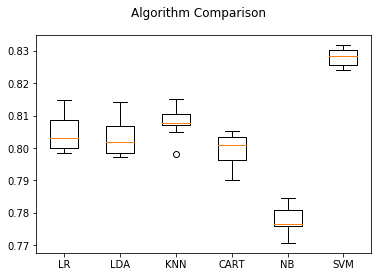

In [16]:
algorithms()

Here I will fit the machine learning model.

In [18]:
svm=KNeighborsClassifier(n_neighbors=11)
svm.fit(x_train,y_train)
svm_prediction=svm.predict(x_test)

Now, the prediction process begins.

In [42]:
features=x_test.reset_index()
features=features[['age','workclass','education_num','marital_status','relationship','race','sex','country']]
actual=(list(y_test))
prediction=(list(svm_prediction))
features['actual']=pd.Series(actual)
features['prediction']=pd.Series(prediction)

In [43]:
print(actual)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 

In [38]:
print(prediction)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 

In [50]:
final=features[['actual','prediction']]

In [48]:
print(final)

       actual  prediction
0           0           0
1           1           0
2           0           0
3           1           1
4           0           0
5           1           0
6           1           1
7           0           0
8           0           0
9           0           0
10          0           0
11          0           0
12          0           1
13          0           0
14          0           0
15          1           1
16          1           0
17          0           0
18          0           0
19          0           0
20          0           0
21          1           0
22          0           0
23          1           0
24          0           0
25          1           1
26          1           1
27          1           0
28          1           1
29          0           0
...       ...         ...
19507       0           0
19508       0           1
19509       0           0
19510       0           0
19511       0           0
19512       1           0
19513       